In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Restaurant_revenue (1).csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [4]:
data.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


<Axes: ylabel='Frequency'>

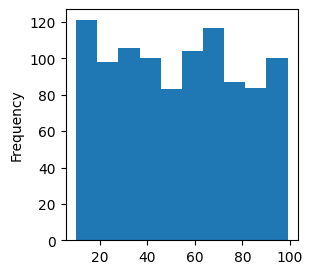

In [13]:
plt.figure(figsize=(3,3))
data["Number_of_Customers"].plot(kind="hist")


<Axes: ylabel='Frequency'>

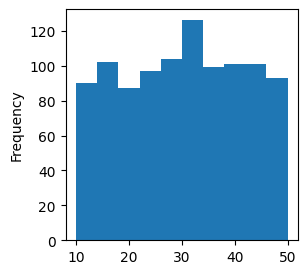

In [16]:
plt.figure(figsize=(3,3))
data["Menu_Price"].plot(kind="hist")

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
ohe = OneHotEncoder()

In [19]:
encoded_cuisine = ohe.fit_transform(data[["Cuisine_Type"]]).toarray()

In [20]:
encoded_cuisine

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [21]:
data["Cuisine_Type"] = encoded_cuisine

In [22]:
data

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,0.0,36.236133,0,45,350.912040
1,24,40.020077,4.577892,0.0,17.952562,0,36,221.319091
2,81,41.981485,4.652911,0.0,22.600420,1,91,326.529763
3,70,43.005307,4.416053,0.0,18.984098,1,59,348.190573
4,30,17.456199,3.475052,0.0,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,0.0,19.033585,1,40,249.312034
996,31,20.615496,5.822885,0.0,17.040990,0,57,110.228767
997,69,17.110656,4.141898,0.0,44.649315,0,55,312.212552
998,73,37.664722,3.046556,0.0,27.767358,0,23,272.482204


In [23]:
feature = data[["Number_of_Customers","Menu_Price","Marketing_Spend","Cuisine_Type","Average_Customer_Spending","Promotions","Reviews"]]
target = data["Monthly_Revenue"]

In [38]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=100)

In [39]:
regression = LinearRegression()

In [40]:
regression.fit(x_train,y_train)

LinearRegression()

In [41]:
prediction = regression.predict(x_test)

In [42]:
prediction

array([ 70.51858239, 314.02399748, 335.90619007, 289.643609  ,
       278.16196715, 214.78470986, 298.40347241, 384.59296716,
       272.42967586, 343.50590602, 262.65245638, 406.38051694,
       263.36414081, 429.43234269, 235.3410505 , 210.86901363,
       263.87030016,  81.39745508, 231.52956614, 349.86468819,
       189.27567792, 390.91927719, 282.49020067, 331.16153157,
       253.46733194, 334.7307309 , 457.20782233, 416.63066516,
       330.71844852, 166.84029767, 258.97967927, 292.25865843,
       233.89205272, 168.43489769, 288.10105554, 268.26286162,
       214.64628963, 210.52990699, 296.63224078, 267.09807913,
       200.06589357, 190.5286969 , 242.9833457 , 329.66630294,
       158.40514088, 189.59859357, 152.69314753, 338.04923784,
       343.00198315, 154.92827586, 388.9230587 , 376.07204637,
       298.15584337, 174.79080657, 228.69888041, 234.6959748 ,
       304.19179097, 435.20651265, 223.03041203, 345.59908251,
       268.31187758, 372.31782122, 206.43808263, 308.11

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.7156583191837727